In [2]:
from syuron import shg
import matplotlib as mpl

current_font_size = mpl.rcParams['font.size']
mpl.rcParams['font.size'] = current_font_size * 1.5
mpl.rcParams['font.family'] = 'Noto Sans CJK JP'

shg.use_gpu()

GPUを使用します: [CudaDevice(id=0)]


True

In [3]:
def create_paired_pplt_widths(L, Lambda0, chirp_factor=0.0):
    widths = []
    z_current = 0.0
    pair_index = 0  # ペアのインデックス
    while z_current < L:
        # ペアごとにチャープを計算
        current_lambda = Lambda0 / (1 + chirp_factor * pair_index)
        half_period = current_lambda / 2.0
        # 次のペア全体がLを超えないか確認
        if z_current + current_lambda <= L:
            # 1ペア（2つのドメイン）を追加
            widths.append(half_period)
            widths.append(half_period)
            z_current += current_lambda
            # 次のペアへ
            pair_index += 1
        else:
            # Lを超える場合はループを終了
            break
    return widths


def create_pplt_widths(L, Lambda0, chirp_factor=0.0):
    widths = []
    z_current = 0.0
    while z_current < L:
        # 現在位置での周期長を計算（チャープ関数）
        # chirp_factor = 0 の場合は均一な構造になる
        current_lambda = Lambda0 / (1 + chirp_factor * z_current)
        half_period = current_lambda / 2.0
        # 正領域の幅を追加
        widths.append(half_period)
        # 負領域の幅を追加（デバイスの境界を考慮）
        if z_current + current_lambda < L:
            widths.append(half_period)
        # 次の周期へ
        z_current += current_lambda
    return widths

[3.5999999046325684, 3.5999999046325684, 3.597409963607788, 3.597409963607788, 3.594825267791748, 3.594825267791748, 3.5922462940216064, 3.5922462940216064, 3.589672803878784, 3.589672803878784, 3.5871050357818604, 3.5871050357818604, 3.5845425128936768, 3.5845425128936768, 3.5819857120513916, 3.5819857120513916, 3.5794341564178467, 3.5794341564178467, 3.576888084411621, 3.576888084411621, 3.574347496032715, 3.574347496032715, 3.571812391281128, 3.571812391281128, 3.5692825317382812, 3.5692825317382812, 3.566758155822754, 3.566758155822754, 3.564239025115967, 3.564239025115967, 3.561725378036499, 3.561725378036499, 3.5592169761657715, 3.5592169761657715, 3.556713819503784, 3.556713819503784, 3.554215908050537, 3.554215908050537, 3.5517232418060303, 3.5517232418060303, 3.5492358207702637, 3.5492358207702637, 3.5467536449432373, 3.5467536449432373, 3.544276714324951, 3.544276714324951, 3.5418050289154053, 3.5418050289154053, 3.5393383502960205, 3.5393383502960205, 3.536876916885376, 3.53

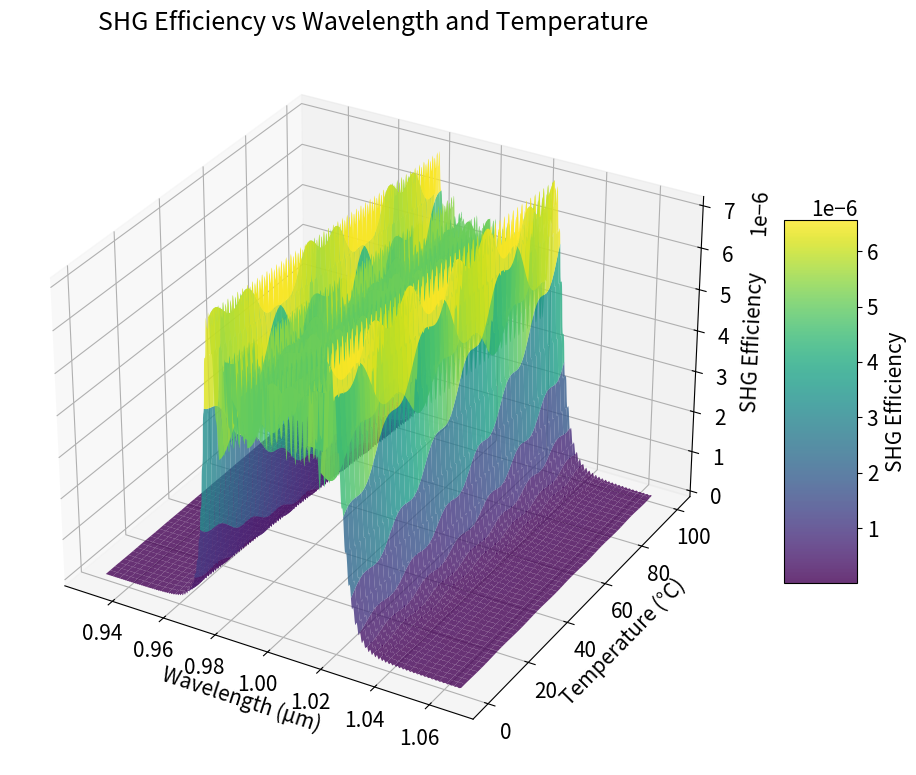

In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.numpy as jnp

# デバイスを設定
L = 2000
kappa_magnitude = 1.31e-05
grating_period = 7.2
widths = jnp.array(create_pplt_widths(L, grating_period, 0.0001))
device = shg.PPMgOSLT(widths, kappa_magnitude)

# ソルバを設定
wavelength_range = jnp.linspace(0.931, 1.066, 1000)
T_range = jnp.linspace(0, 100, 100)
wavelength, T = jnp.meshgrid(wavelength_range, T_range)
solver = shg.EulerNCMESolver(device, wavelength, T)

# 初期値を設定して計算
A0 = 1.0
B0 = 0.0
eff = solver.solve(A0, B0)

# 3Dプロットの作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(wavelength, T, eff, cmap='viridis',  # type: ignore
                       edgecolor='none', alpha=0.8)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='SHG Efficiency')
ax.set_xlabel('Wavelength (μm)')
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('SHG Efficiency')  # type: ignore
ax.set_title('SHG Efficiency vs Wavelength and Temperature')

plt.tight_layout()
plt.show()